<a href="https://colab.research.google.com/github/Utpal-Mishra/Omdena-Cameroon-Chapter-2022/blob/main/OmdenaCameroonChapter2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANGLOPHONE CRISIS**

### The Anglophone Crisis is an ongoing armed conflict in the Republic of Cameroon in Central Africa, where historically English-speaking Ambazonian separatists are seeking the independence of the former British colony of Southern Cameroons, which was unified with Cameroon since 1961.

References: 
1. https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis
2. https://en.wikipedia.org/wiki/Anglophone_Crisis
3. https://en.wikipedia.org/wiki/Anglophone_problem

### Libraries

In [1]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
events = []

# Anglophone Crisis 2017

## Data Extraction

### Requesting Wiki Data Access

In [3]:
"""from google.colab import drive
drive.mount('/content/drive')"""


url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2017)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [5]:
# data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][1]
# print(data)

################################################################################

# print(data.find_all('li')[1].text.split(",")[0].strip())
# print(data.find_all('li')[1].text.split(",", 1)[1].strip())

################################################################################

"""
# days = len(data.find_all('li'))

# Sep 9             
date = data.find_all('li')[0].split(",")[0]
event = data.find_all('li')[0].split(",")[1]

# Sep 11            data.find_all('li')[1]
date = data.find_all('li')[1].split(",")[0]
event = data.find_all('li')[1].split(",")[1]

# Sep 21            data.find_all('li')[2]
date = data.find_all('li')[2].split(",")[0]
event = data.find_all('li')[2].split(",")[1]

# Sep 22            data.find_all('li')[3]
date = data.find_all('li')[3].split(",")[0]
event = data.find_all('li')[3].split(",")[1]

# Sep 29            data.find_all('li')[4]
date = data.find_all('li')[4].split(",")[0]
event = data.find_all('li')[4].split(",")[1]

# Throughtout Sep   data.find_all('li')[5]
date = data.find_all('li')[5].split(",")[0]
event = data.find_all('li')[5].split(",")[1]
"""

################################################################################

# months = len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:])

# september  len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][0]
# october    len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][1]
# november   len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][2]
# december   len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][3]

################################################################################


"""
for i in range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:])):
  #print("Month:")
  print(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]

  for k in range(len(data.find_all('li'))):

    print("Date: ", data.find_all('li')[k].text.split(",")[0].strip())
    print("Event: ", data.find_all('li')[k].text.split(",", 1)[1].strip())
  
  print("\n")
  """

'\nfor i in range(0, len(soup.find_all(\'div\', {\'class\': \'mw-parser-output\'})[0].find_all(\'ul\')[6:])):\n  #print("Month:")\n  print(soup.find_all(\'div\', {\'class\': \'mw-parser-output\'})[0].find_all(\'ul\')[5].find_all(\'li\')[i].find(\'a\').text.split()[1])\n\n  data = soup.find_all(\'div\', {\'class\': \'mw-parser-output\'})[0].find_all(\'ul\')[6:][i]\n\n  for k in range(len(data.find_all(\'li\'))):\n\n    print("Date: ", data.find_all(\'li\')[k].text.split(",")[0].strip())\n    print("Event: ", data.find_all(\'li\')[k].text.split(",", 1)[1].strip())\n  \n  print("\n")\n  '

In [6]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 4/4 [00:00<00:00, 17.32it/s]


### Date Cleaning

In [7]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [8]:
def checkMonth(A17):
  for i in range(len(A17['date'])):
    dt = A17['date'][i].split()

    if len(dt) == 3:
      A17['date'][i] = str(dt[2]) + "/" + dt[1] + "/2017"
    else:
      A17['date'][i] = "30/" + dt[1] + "/2017"
    
  return A17

In [9]:
def checkFormat(A17):
  A17['date'][27] = A17['date'][27].split("–")[1]
  A17['date'][29] = A17['date'][29].replace('some', '12')

  return A17  

In [10]:
def toDate(A17):
  for i in range(len(A17['date'])):
    A17['date'][i] = dt.strptime(A17['date'][i], '%d/%m/%Y').date()

  return A17

In [11]:
def formatEvent(A17):
  for i in range(len(A17)):
    A17['event'][i] = A17['event'][i].replace(A17['event'][i][0], A17['event'][i][0].capitalize())

  return A17

### Creating DataFrame

In [12]:
from datetime import datetime as dt

A17 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A17 = checkMonth(A17)
A17 = checkFormat(A17)
A17 = toDate(A17)
A17 = formatEvent(A17)

A17.head()

,month,date,event
0,September,2017-09-09,The Ambazonia Defence Council (ADC) declared T...
1,September,2017-09-11,A bomb tArgeting security forces wAs detonAted...
2,September,2017-09-21,An improvised bomb wounded three police office...
3,September,2017-09-22,Cameroonian troops opened fire against Angloph...
4,September,2017-09-29,"Cameroonian soldiers moved into Eyumodjock, an..."


In [13]:
for i in event:
  events.append(i)

# Anglophone Crisis 2018

## Data Extraction

### Requesting Wiki Data Access

In [14]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2018)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [15]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [16]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 12/12 [00:02<00:00,  5.40it/s]


### Date Cleaning

In [17]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [18]:
def checkMonth(A18):
  for i in range(len(A18['date'])):
    dt = A18['date'][i].split()

    if len(dt) == 3:
      A18['date'][i] = str(dt[2]) + "/" + dt[1] + "/2018"
    
  return A18

In [19]:
def checkFormat(A18):
  for i in range(len(A18['date'])):
    if A18['date'][i] == 'At some point in February':
      A18['date'][i] = A18['date'][i].replace('At some point in February', '27/02/2018')
    if A18['date'][i] == 'At an unspecified point in May':
      A18['date'][i] = A18['date'][i].replace('At an unspecified point in May', '30/05/2018')
    if A18['date'][i] == 'At some point in June':
      A18['date'][i] = A18['date'][i].replace('At some point in June', '30/06/2018')
    if A18['date'][i] == 'Between 09 1 and 2':
      A18['date'][i] = A18['date'][i].replace('Between 09 1 and 2', '02/09/2018')
    if A18['date'][i] == 'At night on September 4 breaking September 5':
      A18['date'][i] = A18['date'][i].replace('At night on September 4 breaking September 5', '04/09/2018')
    if A18['date'][i] == 'On the weekend of November 10–11':
      A18['date'][i] = A18['date'][i].replace('On the weekend of November 10–11', '09/11/2018')
    if A18['date'][i] == 'Between 12 14 and 15':
      A18['date'][i] = A18['date'][i].replace('Between 12 14 and 15', '14/12/2018')
    if A18['date'][i] == '1–2/12/2018':
      A18['date'][i] = A18['date'][i].replace('1–2/12/2018', '2/12/2018')

  return A18

In [20]:
def toDate(A17):
  for i in range(len(A18['date'])):
    A18['date'][i] = dt.strptime(A18['date'][i], '%d/%m/%Y').date()

  return A18

In [21]:
def formatEvent(A18):
  for i in range(len(A18)):
    A18['event'][i] = A18['event'][i].replace(A18['event'][i][0], A18['event'][i][0].capitalize())

  return A18

### Creating DataFrame

In [22]:
from datetime import datetime as dt

A18 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A18 = checkMonth(A18)
A18 = checkFormat(A18)
A18 = toDate(A18)
A18 = formatEvent(A18)

A18.head()

,month,date,event
0,January,2018-01-05,MeMbers of the AMbazonia InteriM GovernMent we...
1,January,2018-01-12,Two gendarmes were killed in Kombone.[6]
2,January,2018-01-14,"SeparatiStS abducted two SoldierS in Kombone, ..."
3,January,2018-01-18,SoldierS killed at leaSt Seven civilianS and b...
4,January,2018-01-25,SeparatiStS attacked a Cameroonian border croS...


In [23]:
for i in event:
  events.append(i)

# Anglophone Crisis 2019

## Data Extraction

### Requesting Wiki Data Access

In [24]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2019)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [25]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [26]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    try:
      # print(i, k)
      month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

      date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
      #print(data.find_all('li')[k].text.split(",", 1), end="\n")
      event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())
    except:
      pass

100%|██████████| 16/16 [00:04<00:00,  3.65it/s]


### Date Cleaning

In [27]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [28]:
def checkMonth(A19):
  for i in range(len(A19['date'])):
    dt = A19['date'][i].split()

    if len(dt) == 3:
      A19['date'][i] = str(dt[2]) + "/" + dt[1] + "/2019"
    
  return A19

In [29]:
def checkFormat(A19):
  for i in range(len(A19['date'])):
    if A19['date'][i] == '4–27/01/2019':
      A19['date'][i] = A19['date'][i].replace('4–27/01/2019', '5/01/2019')
    if A19['date'][i] == '18–27/01/2019':
      A19['date'][i] = A19['date'][i].replace('18–27/01/2019', '26/01/2019')

    if A19['date'][i] == 'At some point in February':
      A19['date'][i] = A19['date'][i].replace('At some point in February', '27/02/2019')

    if A19['date'][i] == '11–17/03/2019':
      A19['date'][i] = A19['date'][i].replace('11–17/03/2019', '13/03/2019')
    if A19['date'][i] == '11–20/03/2019':
      A19['date'][i] = A19['date'][i].replace('11–20/03/2019', '18/03/2019')

    if A19['date'][i] == 'At an unspecified point in May':
      A19['date'][i] = A19['date'][i].replace('At an unspecified point in May', '30/05/2019')
    if A19['date'][i] == '15–27/05/2019':
      A19['date'][i] = A19['date'][i].replace('15–27/05/2019', '27/05/2019')
    if A19['date'][i] == 'On 05 17 and 05 18':
      A19['date'][i] = A19['date'][i].replace('On 05 17 and 05 18', '18/05/2019')

    if A19['date'][i] == 'At some point in June':
      A19['date'][i] = A19['date'][i].replace('At some point in June', '30/06/2019')

    if A19['date'][i] == 'Between 08 11 and 08 15':
      A19['date'][i] = A19['date'][i].replace('Between 08 11 and 08 15', '11/05/2019')
    if A19['date'][i] == 'Between 08 12 and 08 18':
      A19['date'][i] = A19['date'][i].replace('Between 08 12 and 08 18', '18/05/2019')

    if A19['date'][i] == 'In total':
      A19['date'][i] = A19['date'][i].replace('In total', '25/08/2019')

    if A19['date'][i] == 'Between 09 1 and 2':
      A19['date'][i] = A19['date'][i].replace('Between 09 1 and 2', '02/09/2019')
    if A19['date'][i] == '1–7/09/2019':
      A19['date'][i] = A19['date'][i].replace('1–7/09/2019', '1/09/2019')
    if A19['date'][i] == '3–11/09/2019':
      A19['date'][i] = A19['date'][i].replace('3–11/09/2019', '5/08/2019')
    if A19['date'][i] == '5–9/09/2019':
      A19['date'][i] = A19['date'][i].replace('5–9/09/2019', '8/09/2019')
    if A19['date'][i] == '12–19/09/2019':
      A19['date'][i] = A19['date'][i].replace('12–19/09/2019', '18/09/2019')
    if A19['date'][i] == 'At night on September 4 breaking September 5':
      A19['date'][i] = A19['date'][i].replace('At night on September 4 breaking September 5', '04/09/2019')

    if A19['date'][i] == '16–19/10/2019':
      A19['date'][i] = A19['date'][i].replace('16–19/10/2019', '16/10/2019')
    if A19['date'][i] == '22–26/10/2019':
      A19['date'][i] = A19['date'][i].replace('22–26/10/2019', '26/10/2019')
    if A19['date'][i] == 'October 1 marked the second anniversary of the Ambazonian declaration of independence':
      A19['date'][i] = A19['date'][i].replace('October 1 marked the second anniversary of the Ambazonian declaration of independence', '1/10/2019')

    if A19['date'][i] == 'On the weekend of November 10–11':
      A19['date'][i] = A19['date'][i].replace('On the weekend of November 10–11', '09/11/2019')

    
    if A19['date'][i] == 'At some point in mid-December':
      A19['date'][i] = A19['date'][i].replace('At some point in mid-December', '15/12/2019')
    if A19['date'][i] == 'Between 12 14 and 15':
      A19['date'][i] = A19['date'][i].replace('Between 12 14 and 15', '14/12/2019')
    if A19['date'][i] == '1–2/12/2019':
      A19['date'][i] = A19['date'][i].replace('1–2/12/2019', '2/12/2019')

  return A19

In [30]:
def toDate(A19):
  for i in range(len(A19['date'])):
    #print(A19['date'][i])
    A19['date'][i] = dt.strptime(A19['date'][i], '%d/%m/%Y').date()

  return A19

In [31]:
def formatEvent(A19):
  for i in range(len(A19)):
    A19['event'][i] = A19['event'][i].replace(A19['event'][i][0], A19['event'][i][0].capitalize())

  return A19

### Creating DataFrame

In [32]:
from datetime import datetime as dt

A19 = pd.DataFrame({"month": month[:-3],
                    "date" : date[:-3],
                    "event": event[:-1]})

A19 = checkMonth(A19)
A19 = checkFormat(A19)
A19 = toDate(A19)
A19 = formatEvent(A19)

A19.head()

,month,date,event
0,January,2019-01-02,Armed men chopped the hAnds or fingers off At ...
1,January,2019-01-03,Armed men burned down the residence of Prime M...
2,January,2019-01-04,SeparatiStS killed two SoldierS and wounded tw...
3,January,2019-01-05,The Cameroonian Army claimed To have killed 68...
4,January,2019-01-06,Anglophone Cameroonians in the diaspora organi...


In [33]:
for i in event:
  events.append(i)

# Anglophone Crisis 2020

## Data Extraction

### Requesting Wiki Data Access

In [34]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2020)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [35]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [36]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 13/13 [00:02<00:00,  5.22it/s]


### Date Cleaning

In [37]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [38]:
def checkMonth(A20):
  for i in range(len(A20['date'])):
    dt = A20['date'][i].split()

    if len(dt) == 3:
      A20['date'][i] = str(dt[2]) + "/" + dt[1] + "/2020"
    
  return A20

In [39]:
def checkFormat(A20):
  for i in range(len(A20['date'])):
    if A20['date'][i] == '28–29/01/2020':
      A20['date'][i] = A20['date'][i].replace('28–29/01/2020', '29/01/2020')

    if A20['date'][i] == '1–4/03/2020':
      A20['date'][i] = A20['date'][i].replace('1–4/03/2020', '4/03/2020')

    if A20['date'][i] == 'On 04 18 and 19':
      A20['date'][i] = A20['date'][i].replace('On 04 18 and 19', '19/04/2020')

    if A20['date'][i] == 'By the end of June':
      A20['date'][i] = A20['date'][i].replace('By the end of June', '30/06/2020')

    if A20['date'][i] == '3–5/07/2020':
      A20['date'][i] = A20['date'][i].replace('3–5/07/2020', '3/07/2020')
    if A20['date'][i] == '13–19/07/2020':
      A20['date'][i] = A20['date'][i].replace('13–19/07/2020', '19/07/2020')

    if A20['date'][i] == 'In late-September':
      A20['date'][i] = A20['date'][i].replace('In late-September', '30/09/2020')

    if A20['date'][i] == "October 1 marked the three-year anniversary of Ambazonia's declaration of independence. To commemorate the occasion":
      A20['date'][i] = A20['date'][i].replace("October 1 marked the three-year anniversary of Ambazonia's declaration of independence. To commemorate the occasion", '1/10/2020')

    if A20['date'][i] == '20–21/11/2020':
      A20['date'][i] = A20['date'][i].replace('20–21/11/2020', '21/11/2020')
    
    if A20['date'][i] == 'In his end-of-year speech':
      A20['date'][i] = A20['date'][i].replace('In his end-of-year speech', '31/12/2020')

  A20['date'][len(A20['date']) - 3] = '28/12/2020'

  return A20

In [40]:
def toDate(A20):
  for i in range(len(A20['date'])):
    A20['date'][i] = dt.strptime(A20['date'][i], '%d/%m/%Y').date()

  return A20

In [41]:
def formatEvent(A20):
  for i in range(len(A20)):
    A20['event'][i] = A20['event'][i].replace(A20['event'][i][0], A20['event'][i][0].capitalize())

  return A20

### Creating DataFrame

In [42]:
from datetime import datetime as dt

A20 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A20 = checkMonth(A20)
A20 = checkFormat(A20)
A20 = toDate(A20)
A20 = formatEvent(A20)

A20.head()

,month,date,event
0,January,2020-01-01,SuSpected SeparatiStS burned down the office o...
1,January,2020-01-02,Civilians in Balikumbat demonstrated against t...
2,January,2020-01-04,Residents of Balikumbat stoRmed neaRby sepaRat...
3,January,2020-01-05,Fon Ndofoa Zofoa III of Babungo gave separatis...
4,January,2020-01-06,"""General Divine"", a separatist commander based..."


In [43]:
for i in event:
  events.append(i)

# Anglophone Crisis 2021

## Data Extraction

### Requesting Wiki Data Access

In [44]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2021)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [45]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [46]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 13/13 [00:08<00:00,  1.57it/s]


### Date Cleaning

In [47]:
def checkDate(date):
  for i in range(len(date)):
    try:
      if date[i].split()[1] == 'January':
        date[i] = date[i].replace('January', '01')
      if date[i].split()[1] == 'February':
        date[i] = date[i].replace('February', '02')
      if date[i].split()[1] == 'March':
        date[i] = date[i].replace('March', '03')
      if date[i].split()[1] == 'April':
        date[i] = date[i].replace('April', '04')
      if date[i].split()[1] == 'May':
        date[i] = date[i].replace('May', '05')
      if date[i].split()[1] == 'June':
        date[i] = date[i].replace('June', '06')
      if date[i].split()[1] == 'July':
        date[i] = date[i].replace('July', '07')
      if date[i].split()[1] == 'August':
        date[i] = date[i].replace('August', '08')
      if date[i].split()[1] == 'September':
        date[i] = date[i].replace('September', '09')
      if date[i].split()[1] == 'October':
        date[i] = date[i].replace('October', '10')
      if date[i].split()[1] == 'November':
        date[i] = date[i].replace('November', '11')
      if date[i].split()[1] == 'December':
        date[i] = date[i].replace('December', '12')
    except:
      pass
      
  return date

date = checkDate(date)

In [48]:
def checkMonth(A21):
  for i in range(len(A21['date'])):
    dt = A21['date'][i].split()

    if len(dt) == 3:
      A21['date'][i] = str(dt[2]) + "/" + dt[1] + "/2021"
    
  return A21

In [49]:
def checkFormat(A21):
  for i in range(len(A21['date'])):
    if A21['date'][i] == '12–16/01/2021':
      A21['date'][i] = A21['date'][i].replace('12–16/01/2021', '12/01/2021')
    if A21['date'][i] == '14–15/01/2021':
      A21['date'][i] = A21['date'][i].replace('14–15/01/2021', '15/01/2021')

    if A21['date'][i] == '2–4/02/2021':
      A21['date'][i] = A21['date'][i].replace('2–4/02/2021', '2/02/2021')
    if A21['date'][i] == '21–28/02/2021':
      A21['date'][i] = A21['date'][i].replace('21–28/02/2021', '28/02/2021')
    if A21['date'][i] == '23–24/02/2021':
      A21['date'][i] = A21['date'][i].replace('23–24/02/2021', '23/02/2021')

    if A21['date'][i] == '24–25/04/2021':
      A21['date'][i] = A21['date'][i].replace('24–25/04/2021', '25/04/2021')

    if A21['date'][i] == 'During the first week of May':
      A21['date'][i] = A21['date'][i].replace('During the first week of May', '7/05/2021')
    if A21['date'][i] == '8–9/05/2021':
      A21['date'][i] = A21['date'][i].replace('8–9/05/2021', '9/05/2021')
    if A21['date'][i] == 'In the week leading up to May 20':
      A21['date'][i] = A21['date'][i].replace('In the week leading up to May 20', '20/05/2021')
    if A21['date'][i] == '23–25/05/2021':
      A21['date'][i] = A21['date'][i].replace('23–25/05/2021', '23/05/2021')

    if A21['date'][i] == '8-9/06/2021':
      A21['date'][i] = A21['date'][i].replace('8-9/06/2021', '9/06/2021')
    if A21['date'][i] == 'At some point in late-June':
      A21['date'][i] = A21['date'][i].replace('At some point in late-June', '29/06/2021')
    if A21['date'][i] == 'Overall':
      A21['date'][i] = A21['date'][i].replace('Overall', '30/06/2021')
    
    if A21['date'][i] == '9-10/09/2021':
      A21['date'][i] = A21['date'][i].replace('9-10/09/2021', '10/09/2021')

    if A21['date'][i] == '21-21/10/2021':
      A21['date'][i] = A21['date'][i].replace('21-21/10/2021', '21/10/2021')

  return A21

In [50]:
def toDate(A17):
  for i in range(len(A21['date'])):
    A21['date'][i] = dt.strptime(A21['date'][i], '%d/%m/%Y').date()

  return A21

In [51]:
def formatEvent(A21):
  for i in range(len(A21)):
    A21['event'][i] = A21['event'][i].replace(A21['event'][i][0], A21['event'][i][0].capitalize())

  return A21

### Creating DataFrame

In [52]:
from datetime import datetime as dt

A21 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A21 = checkMonth(A21)
A21 = checkFormat(A21)
A21 = toDate(A21)
A21 = formatEvent(A21)

A21.head()

,month,date,event
0,January,2021-01-01,Two suspecTed separaTisTs were killed by Camer...
1,January,2021-01-06,SeparatiSt fighterS ambuShed the convoy of the...
2,January,2021-01-07,SoldierS diScovered and deactivated an improvi...
3,January,2021-01-08,"SeparatiStS killed three gendarme officerS, on..."
4,January,2021-01-09,"Armed men killed A school principAl in Ossing,..."


In [53]:
for i in event:
  events.append(i)

# Anglophone Crisis 2022

## Data Extraction

### Requesting Wiki Data Access

In [54]:
url = 'https://en.wikipedia.org/wiki/Timeline_of_the_Anglophone_Crisis_(2022)'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


### HTML Parsing

In [55]:
soup = BeautifulSoup(r.text, 'html.parser')
# data = soup.find_all('h2')[1:-2]
# print(data[0])
# month = data[0].find().text

In [56]:
month = []
date  = []
event = []

for i in tqdm(range(0, len(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:]))):
  data = soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[6:][i]
  
  for k in range(len(data.find_all('li'))):
    month.append(soup.find_all('div', {'class': 'mw-parser-output'})[0].find_all('ul')[5].find_all('li')[i].find('a').text.split()[1])

    date.append(data.find_all('li')[k].text.split(",")[0].strip()) #.split(" ", 1)[1])
    event.append(data.find_all('li')[k].text.split(",", 1)[1].strip())

100%|██████████| 12/12 [00:05<00:00,  2.23it/s]


### Date Cleaning

In [57]:
def checkDate(date):
  for i in range(len(date)):
    if date[i].split()[1] == 'January':
      date[i] = date[i].replace('January', '01')
    if date[i].split()[1] == 'February':
      date[i] = date[i].replace('February', '02')
    if date[i].split()[1] == 'March':
      date[i] = date[i].replace('March', '03')
    if date[i].split()[1] == 'April':
      date[i] = date[i].replace('April', '04')
    if date[i].split()[1] == 'May':
      date[i] = date[i].replace('May', '05')
    if date[i].split()[1] == 'June':
      date[i] = date[i].replace('June', '06')
    if date[i].split()[1] == 'July':
      date[i] = date[i].replace('July', '07')
    if date[i].split()[1] == 'August':
      date[i] = date[i].replace('August', '08')
    if date[i].split()[1] == 'September':
      date[i] = date[i].replace('September', '09')
    if date[i].split()[1] == 'October':
      date[i] = date[i].replace('October', '10')
    if date[i].split()[1] == 'November':
      date[i] = date[i].replace('November', '11')
    if date[i].split()[1] == 'December':
      date[i] = date[i].replace('December', '12')

  return date

date = checkDate(date)

In [58]:
def checkMonth(A22):
  for i in range(len(A22['date'])):
    dt = A22['date'][i].split()

    if len(dt) == 3:
      A22['date'][i] = str(dt[2]) + "/" + dt[1] + "/2022"
    
  return A22

In [59]:
def checkFormat(A22):
  for i in range(len(A22['date'])):
    if A22['date'][i] == 'The delayed AFCON is scheduled to be held in Limbe and Buea starting on January 9. Cameroon has deployed additional troops to the cities':
      A22['date'][i] = A22['date'][i].replace('The delayed AFCON is scheduled to be held in Limbe and Buea starting on January 9. Cameroon has deployed additional troops to the cities', '09/01/2022')

    if A22['date'][i] == '25–26/06/2022':
      A22['date'][i] = A22['date'][i].replace('25–26/06/2022', '26/06/2022')

  return A22

In [60]:
def toDate(A17):
  for i in range(len(A22['date'])):
    A22['date'][i] = dt.strptime(A22['date'][i], '%d/%m/%Y').date()

  return A22

In [61]:
def formatEvent(A22):
  for i in range(len(A22)):
    A22['event'][i] = A22['event'][i].replace(A22['event'][i][0], A22['event'][i][0].capitalize())

  return A22

### Creating DataFrame

In [62]:
from datetime import datetime as dt

A22 = pd.DataFrame({"month": month,
                    "date" : date,
                    "event": event})

A22 = checkMonth(A22)
A22 = checkFormat(A22)
A22 = toDate(A22)
A22 = formatEvent(A22)

A22.head()

,month,date,event
0,January,2022-01-03,SeparatiStS detonated an improviSed exploSive ...
1,January,2022-01-09,While separatists have Warned the Confederatio...
2,January,2022-01-08,Cameroonian army soldiers on patrol in a milit...
3,January,2022-01-11,SDF senator Henry Kemende was killed in Bamend...
4,January,2022-01-12,The Mali national football team suspended trai...


In [63]:
for i in event:
  events.append(i)

# Knowledge Graph

> References
1. https://bit.ly/3iikeXv
2. https://bit.ly/3iob9fU
3. https://bit.ly/3OOVouG
4. https://bit.ly/3OOMFsf
5. https://bit.ly/3Fd83nW 

### Libraries

In [64]:
import re
import bs4
import requests

import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

### Knowledge DataFrame

In [65]:
Events = pd.DataFrame({'events': events})
Events.head()

,events
0,the Ambazonia Defence Council (ADC) declared the deployment of the Ambazonia Defence Forces (ADF) and the launching of combat operations to achieve the independence of Ambazonia. The ADF carried o...
1,a bomb targeting security forces was detonated in the city of Bamenda.[2] ADF claimed responsibility for the attack.[1]
2,"an improvised bomb wounded three police officers in Bamenda. Separatists were blamed for the attack, which the governor described as an act of terrorism.[3]"
3,"Cameroonian troops opened fire against Anglophone protestors. According to eyewitnesses, five people were shot dead and many more were injured.[4] In Ekok, 700 protesters attacked police stations ..."
4,"Cameroonian soldiers moved into Eyumodjock, and took over a farm belonging to separatist leader Sisiku Julius Ayuk Tabe.[6]"


### Extracting Source, Target and Edge

In [66]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5  
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]


def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [67]:
entity_pairs = []
for i in tqdm(Events['events']):
    entity_pairs.append(get_entities(i))


relations = [get_relation(i) for i in tqdm(Events['events'])]

100%|██████████| 886/886 [00:10<00:00, 84.93it/s]


In [68]:
# extract subject
source = [i[0] for i in entity_pairs]
# extract object
target = [i[1] for i in entity_pairs]

# dataframe
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations}) 

# using regular expression to clean the text
for i in range(kg_df.shape[0]):
  kg_df.source[i] = re.sub(r"[^0-9a-zA-Z]+[0-9]", '', kg_df.source[i])
  kg_df.source[i] = re.sub(r"[0-9]", '', kg_df.source[i])

  kg_df.target[i] = re.sub(r"[^0-9a-zA-Z]+[0-9]", '', kg_df.target[i])
  kg_df.target[i] = re.sub(r"[0-9]", '', kg_df.target[i])

  kg_df.edge[i] = re.sub(r"[^0-9a-zA-Z]+[0-9]", '', kg_df.edge[i])
  kg_df.edge[i] = re.sub(r"[0-9]", '', kg_df.edge[i])
  kg_df.edge[i] = kg_df.edge[i].split()[0]

kg_df

,source,target,edge
0,Cameroonian soldiers,attack,killed
1,security ADF,attack,claimed
2,governor,terrorism,blamed
3,protesters,public police spaces,attacked
4,Cameroonian soldiers,separatist Julius Ayuk Tabe,moved
...,...,...,...
881,Ambazonian commander,Nigerian General Kurmi,arrested
882,Cameroonian soldier,Northwest Region,shot
883,civilian,armed Awing,killed
884,separatist fighters,Cameroonian Etienne Bamessing,killed


### Graph

1. A17 Shape: (30, 3)
2. A18 Shape: (159, 3)
3. A19 Shape: (212, 3)
4. A20 Shape: (161, 3)
5. A21 Shape: (187, 3)
6. A22 Shape: (135, 3)

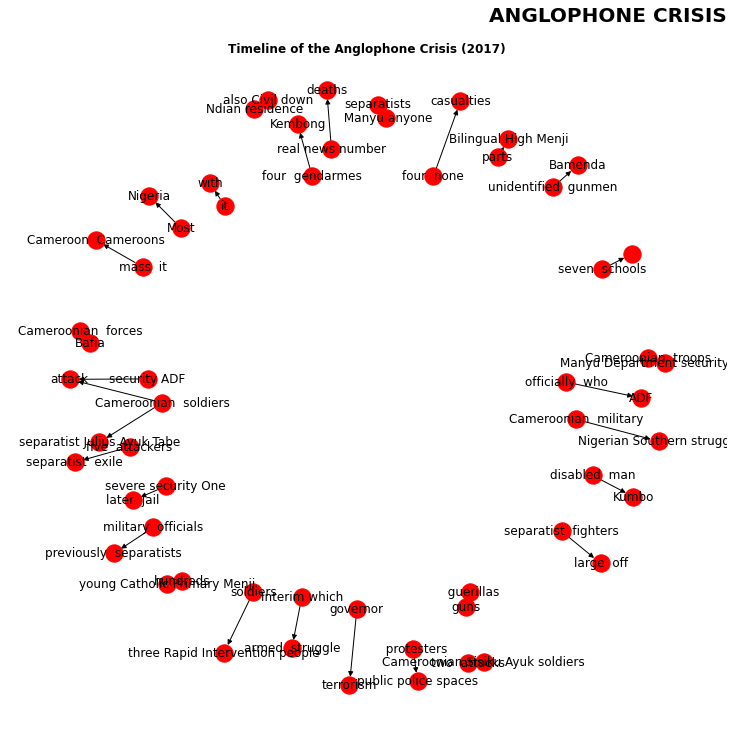

In [69]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[:30], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2017)', fontweight='bold')
plt.show()

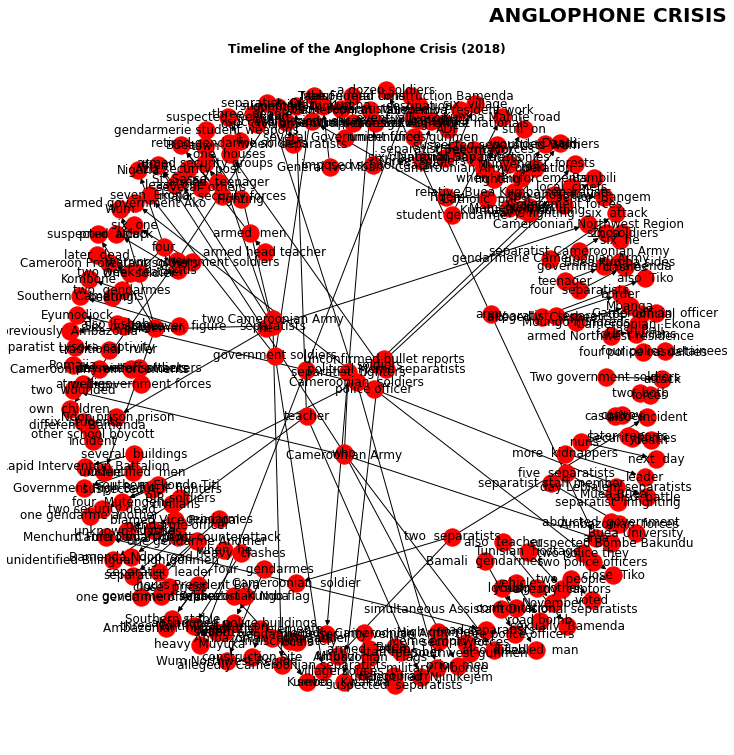

In [70]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[30:189], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2018)', fontweight='bold')
plt.show()

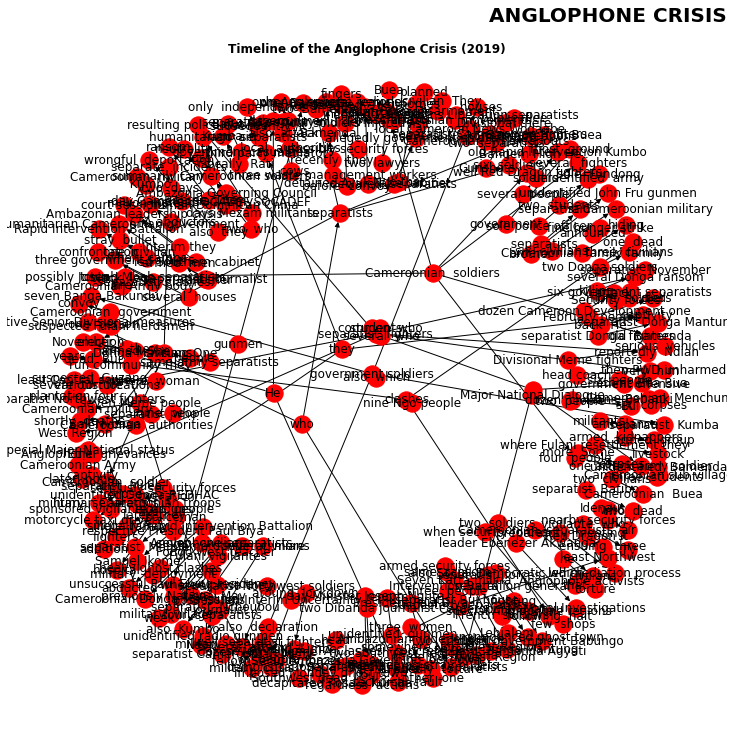

In [71]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[189:401], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2019)', fontweight='bold')
plt.show()

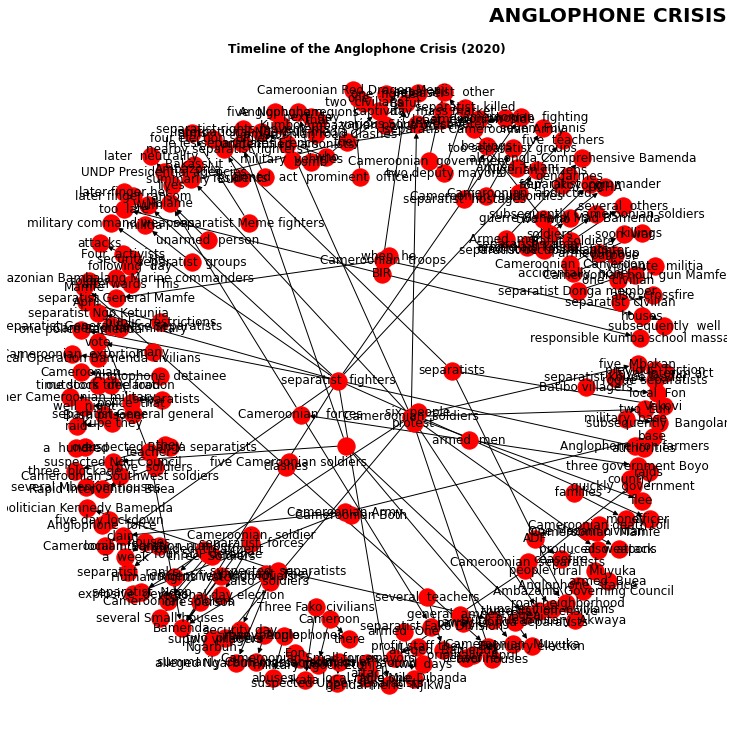

In [72]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[401:562], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2020)', fontweight='bold')
plt.show()

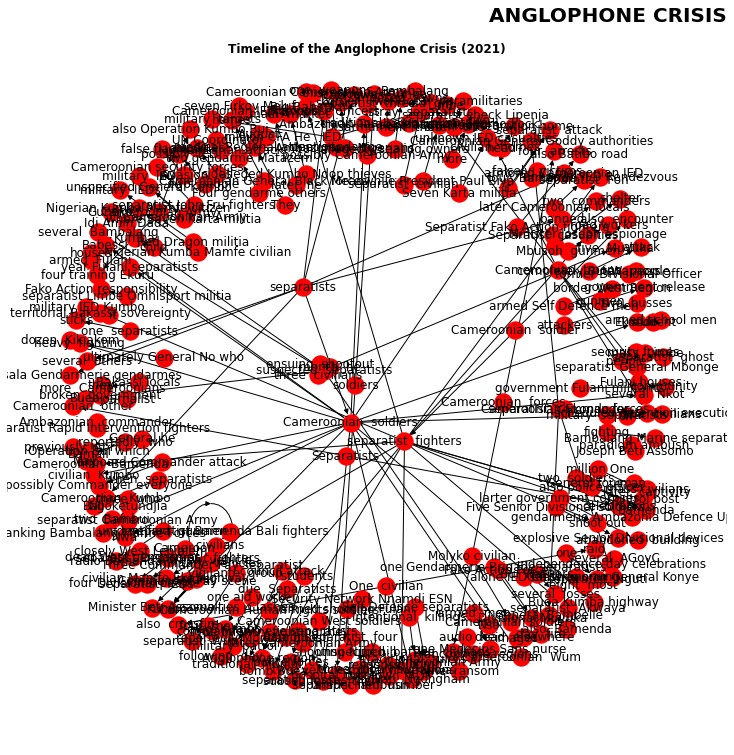

In [73]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[562:749], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2021)', fontweight='bold')
plt.show()

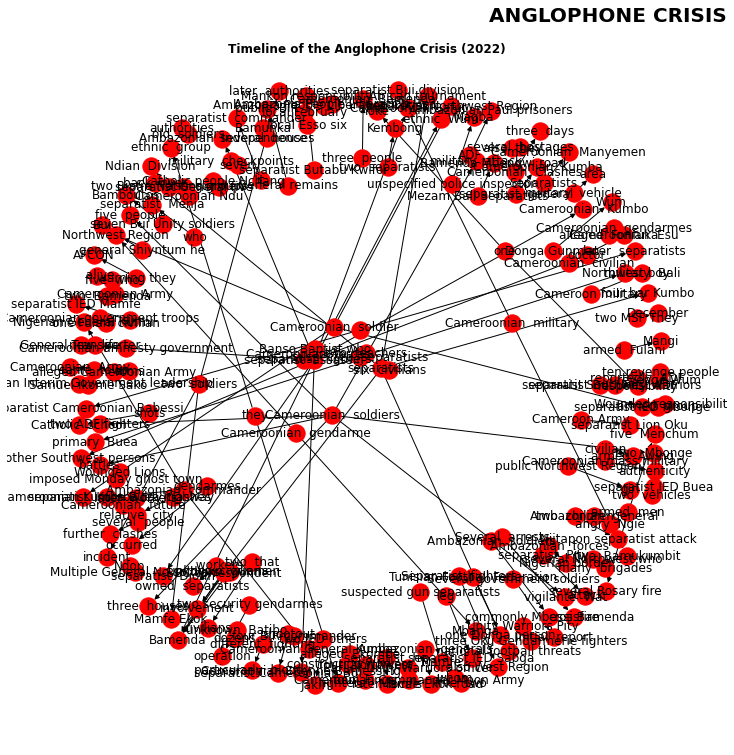

In [74]:
# create a directed-graph from a dataframe
G = nx.from_pandas_edgelist(kg_df[749:], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.title("ANGLOPHONE CRISIS", fontsize=20, loc='right', fontweight='bold')
plt.suptitle('Timeline of the Anglophone Crisis (2022)', fontweight='bold')
plt.show()

# Pyvis

In [75]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 6.4 MB/s 
     |████████████████████████████████| 40 kB 6.6 MB/s 
     |████████████████████████████████| 1.6 MB 49.8 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=8ab7e163124ed7c9a25eefe3161c69194227111de67e5ff59312358a658a0f9a
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


In [76]:
from pyvis.network import Network

sources = kg_df[749:]['source']
targets = kg_df[749:]['target']
weights = kg_df[749:]['edge']

edge_data = zip(sources, targets, weights)

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
net.barnes_hut()

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                net.add_node(src, src, title=src)
                net.add_node(dst, dst, title=dst)
                net.add_edge(src, dst, value=w)

neighbor_map = net.get_adj_list()

# add neighbor data to node hover data
for node in net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

net.toggle_physics(True)
net.show_buttons(filter_=True)
net.show('A22.html')

In [77]:
"""G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()

################################################################################

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

################################################################################

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()"""

'G=nx.from_pandas_edgelist(kg_df[kg_df[\'edge\']=="composed by"], "source", "target", \n                          edge_attr=True, create_using=nx.MultiDiGraph())\n\nplt.figure(figsize=(12,12))\npos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes\nnx.draw(G, with_labels=True, node_color=\'red\', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight=\'bold\')\nplt.show()\n\n################################################################################\n\nG=nx.from_pandas_edgelist(kg_df[kg_df[\'edge\']=="written by"], "source", "target", \n                          edge_attr=True, create_using=nx.MultiDiGraph())\n\nplt.figure(figsize=(12,12))\npos = nx.spring_layout(G, k = 0.5)\nnx.draw(G, with_labels=True, node_color=\'red\', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)\nplt.show()\n\n################################################################################\n\nG=nx.from_pandas_edgelist(kg_df[kg_df[\'edge\']=="released in"], "source", "targe

# WordCloud

In [106]:
from wordcloud import WordCloud, STOPWORDS

bag = pd.DataFrame(kg_df.edge.value_counts()).reset_index()
bag.rename(columns = {'index':'Events', 'edge':'Frequency'}, inplace = True)
bag.Frequency = bag.Frequency.apply(lambda x: int(x))
bag.head()

,Events,Frequency
0,killed,202
1,claimed,60
2,abducted,35
3,attacked,32
4,were,31


In [107]:
bag = bag.assign(Percentage= bag.Frequency*100/bag.Frequency.sum())
bag.head()

,Events,Frequency,Percentage
0,killed,202,22.799097
1,claimed,60,6.772009
2,abducted,35,3.950339
3,attacked,32,3.611738
4,were,31,3.498871


In [79]:
fig = go.Figure()
fig = px.bar(bag, x="Events", y="Frequency", text = "Frequency", color='Events')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title_text = "Events", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency", showline=True, linewidth=2, linecolor='black', mirror=True)
#fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(height=600, width=1400, title_text="Frequency of Events During Anglophone Crisis (2017 - Present)") 
fig.show()

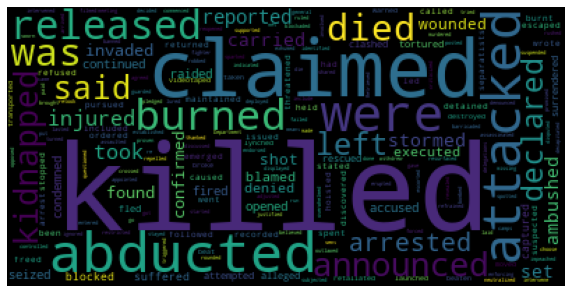

In [80]:
wc = {}
for w, c in bag.values:
    wc[w] = c
    
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=wc)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentimental Analysis

In [81]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.7 MB/s 


In [82]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [83]:
for i in range(len(Events)):
  Events.events[i] = re.sub(r"[^0-9a-zA-Z]+[0-9]", '', Events.events[i])
  Events.events[i] = re.sub(r"[0-9]", '', Events.events[i])
  Events.events[i] = re.sub(r"[]]", '', Events.events[i])

In [84]:
analyser = SentimentIntensityAnalyzer()

for i in range(len(Events)):
  print("Event {}: {}".format(i, Events['events'][i]))
  print("Sentiment: {}".format(analyser.polarity_scores(Events['events'][i])), end = "\n\n")

Event 0: the Ambazonia Defence Council (ADC) declared the deployment of the Ambazonia Defence Forces (ADF) and the launching of combat operations to achieve the independence of Ambazonia. The ADF carried out a guerilla attack against military base in Besongabang, Manyu Division. The ADF commander in charge claimed his soldiers managed to return to base unreduced. Three Cameroonian soldiers were killed in the attack
Sentiment: {'neg': 0.182, 'neu': 0.779, 'pos': 0.039, 'compound': -0.9062}

Event 1: a bomb targeting security forces was detonated in the city of Bamenda ADF claimed responsibility for the attack
Sentiment: {'neg': 0.266, 'neu': 0.633, 'pos': 0.101, 'compound': -0.5994}

Event 2: an improvised bomb wounded three police officers in Bamenda. Separatists were blamed for the attack, which the governor described as an act of terrorism
Sentiment: {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.9325}

Event 3: Cameroonian troops opened fire against Anglophone protestors. A

In [85]:
Liked=[]
for i in range(len(Events)):
  Liked.append(TextBlob(Events['events'][i]).polarity)
  # print("Event {}: {}".format(i, Events['events'][i], Liked[i])) 
  # print("Sentiment: {}".format(Liked[i]), end="\n\n")

for i in range(len(Liked)):
  if(Liked[i] <= 0.025):
    Liked[i] = -2
  if(0.025 <= Liked[i] <= 0.1):
    Liked[i] = -1
  if(0.1 < Liked[i] < 0.325):
    Liked[i] = 0
  if(0.325 <= Liked[i]):
    Liked[i] = 1
    
# print(Liked)    

In [86]:
label = []

for i in Liked:
  if i == 1:
    label.append("Level 0")
  if i == 0:
    label.append("Level 1")
  if i == -1:
    label.append("Level 2")
  if i == -2:
    label.append("Level 3")

In [87]:
#for i in range(len(Events)):
#  if TextBlob(Events['events'][i]).polarity == 0.325:
#    print("Event {}: {}".format(i, Events['events'][i])) 
#    print("Sentiment: {}".format(TextBlob(Events['events'][i]).polarity), end="\n\n")

In [88]:
sentiment = pd.DataFrame({'Events': Events['events'], 'Crime': label, 'Vector': Liked})
sentiment.tail()

,Events,Crime,Vector
881,"an Ambazonian commander known as ""General Basile"" was arrested by the Nigerian police in Kurmi, Taraba State",Level 2,-1
882,a Cameroonian soldier was shot and killed by separatists in the Northwest Region,Level 3,-2
883,"a civilian was killed in an armed attack in Awing, Santa",Level 3,-2
884,"three separatist fighters including ""General Fire of Bamuka"" (born Etienne Njoya) were killed in an operation lauched by Cameroonian forces in Bamessing, Ndop",Level 3,-2
885,"an Ambazonian commander, General Etah and others were reportedly killed by Cameroonian forces operating between Kumba and Mamfe",Level 3,-2


## Building Machine Learning Classifiers

### Importing Libraries

In [111]:
import re
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

### Developing Corpus

In [113]:
sentiment = sentiment[['Events', 'Vector']]
# label = sentiment.Crime.factorize()
# incident = sentiment.Events.values

In [114]:
corpus=[]

for i in tqdm(range(sentiment.shape[0])):
  review = re.sub('[^a-zA-z]',' ', str(sentiment.Events[i]))
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)  

#print(corpus)

100%|██████████| 886/886 [00:04<00:00, 196.61it/s]


### Vectorizing and Spliting Data

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X = cv.fit_transform(corpus).toarray()
Y = sentiment.iloc[:, 1].values

print("X Shape: {}\nY Shape: {}".format(X.shape, Y.shape))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[:1000], Y[:1000], test_size = 0.2)

X Shape: (886, 500)
Y Shape: (886,)


## Cross-Validation

In [116]:
"""models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()"""

'models_list = []\nmodels_list.append((\'CART\', DecisionTreeClassifier()))\nmodels_list.append((\'SVM\', SVC())) \nmodels_list.append((\'NB\', GaussianNB()))\nmodels_list.append((\'KNN\', KNeighborsClassifier()))\n\nnum_folds = 10\nresults = []\nnames = []\n\nfor name, model in models_list:\n    kfold = KFold(n_splits=num_folds)\n    start = time.time()\n    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=\'accuracy\')\n    end = time.time()\n    results.append(cv_results)\n    names.append(name)\n    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))\n\nfig = plt.figure()\nfig.suptitle(\'Performance Comparison\')\nax = fig.add_subplot(111)\nplt.boxplot(results)\nax.set_xticklabels(names)\nplt.show()'

## Support Vector Machine

In [117]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
num_folds = 10

model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.868692 using {'C': 1.3, 'kernel': 'sigmoid'}
0.802254 (0.028212) with: {'C': 0.1, 'kernel': 'linear'}
0.865875 (0.021849) with: {'C': 0.1, 'kernel': 'poly'}
0.865875 (0.021849) with: {'C': 0.1, 'kernel': 'rbf'}
0.865875 (0.021849) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.802254 (0.030248) with: {'C': 0.3, 'kernel': 'linear'}
0.865875 (0.021849) with: {'C': 0.3, 'kernel': 'poly'}
0.865875 (0.021849) with: {'C': 0.3, 'kernel': 'rbf'}
0.865875 (0.021849) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.802254 (0.030248) with: {'C': 0.5, 'kernel': 'linear'}
0.864467 (0.024362) with: {'C': 0.5, 'kernel': 'poly'}
0.865875 (0.021849) with: {'C': 0.5, 'kernel': 'rbf'}
0.865875 (0.021849) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.802254 (0.030248) with: {'C': 0.7, 'kernel': 'linear'}
0.864467 (0.024362) with: {'C': 0.7, 'kernel': 'poly'}
0.865875 (0.021849) with: {'C': 0.7, 'kernel': 'rbf'}
0.864467 (0.023534) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.802254 (0.030248) with: {'C': 0.9, 'kernel': 'lin

### Preparing the Model

In [118]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
model = SVC(C=0.1, kernel='poly')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()

print( "Run Time: %f" % (end-start))

Run Time: 0.140508


### Estimating accuracy on the Test Dataset

In [119]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

# print(confusion_matrix(Y_test, predictions))

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print("Accuracy score %f" % accuracy_score(Y_test, predictions))
# print(classification_report(Y_test, predictions))

Accuracy: 89.89%


## KNN Classifier

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#classifier.score(X_test, Y_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {}".format(accuracy * 100.0), end="\n\n")

# cm = confusion_matrix(Y_test, Y_pred)
# print(cm)
# print(classification_report(Y_test, predictions))

Accuracy: 89.8876404494382



## Naive Bayes

In [121]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
#classifier.score(X_test, Y_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {}".format(accuracy * 100.0), end="\n\n")

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test, Y_pred)
# print(cm)

Accuracy: 64.60674157303372



## Decision Tree

In [122]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
# classifier.score(X_test, Y_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {}".format(accuracy * 100.0), end="\n\n")

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test, Y_pred)
# print(cm)

Accuracy: 83.14606741573034

